# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings(action='ignore')


# Importing the dataset


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Kaggle Dataset/Titanic Dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Kaggle Dataset/Titanic Dataset/test.csv')

train_df.shape, test_df.shape

((891, 12), (418, 11))

# Skimming through the training and test dataset



In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Dictionary



* Survived - Survival - 0 = No, 1 = Yes
* Pclass - Ticket Class - 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex = Sex
* Age = Age in years
* SibSp = # of siblings / spouses aboard the Titanic
* Parch = # of parents/ children abosrd the Titanic
* Ticket = Ticket number 
* Fare = Passenger fare
* Cabin = Cabin number
* Embarked = Port of Embarkation 
  * C = Cherbourg, Q = Queenstown, S = Southampton







# Exploratory data analysis

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Hence, age, fare, cabin, embarked, boat, body, and home.dest have missing values.

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* age, cabin, embarked, boat, body and home.dest have the missing values

## Univariate Analysis

### Seggregating columns into groups

In [ ]:
numerical_features = ['Age', 'SibSp', 'Fare', 'Parch']
object_features = ['Sex', 'Embarked']
categorical_int = ['Pclass']

In [ ]:
def UVA_numeric(data, var_group):
  '''
  Univariate Analysis of numeric columns
  takes a group of variables(Integer and Float)
  and plot/print all the descriptives and properties along with KDE
  runs a loop: calculate all the descriptives of i(th) variable and plot/print it.
  '''

  size = len(var_group)
  plt.figure(figsize=(7*size, 3), dpi=120)

  # looping over each feature
  for j ,i in enumerate(var_group):

    # calculating of descriptives of variables
    minm = data[i].min()
    maxm = data[i].max()
    ran = maxm - minm
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    
    # calculation of points of inflection
    points = mean-st_dev, mean+st_dev

    #plotting the variables with every information
    plt.subplot(1, size, j+1)
    sns.kdeplot(data[i], shade=True)
    sns.scatterplot([minm, maxm], [0,0], color='blue', label='max/min')
    sns.scatterplot([mean], [0], color='green', label='mean')
    sns.scatterplot([median], [0], color='orange', label='median')
    sns.scatterplot(points, [0,0], color='pink', label='points of inflection')
    plt.xlabel(f'{i}')
    plt.ylabel('Density')
    plt.title(f'Point of Inflection={(round(points[0],2), round(points[1],2))}; range={round(ran,2)};\nskewness={round(skew,2)}; kurtosis={round(kurt,2)}; \nmean={round(mean,2)}; median={round(median,2)}')

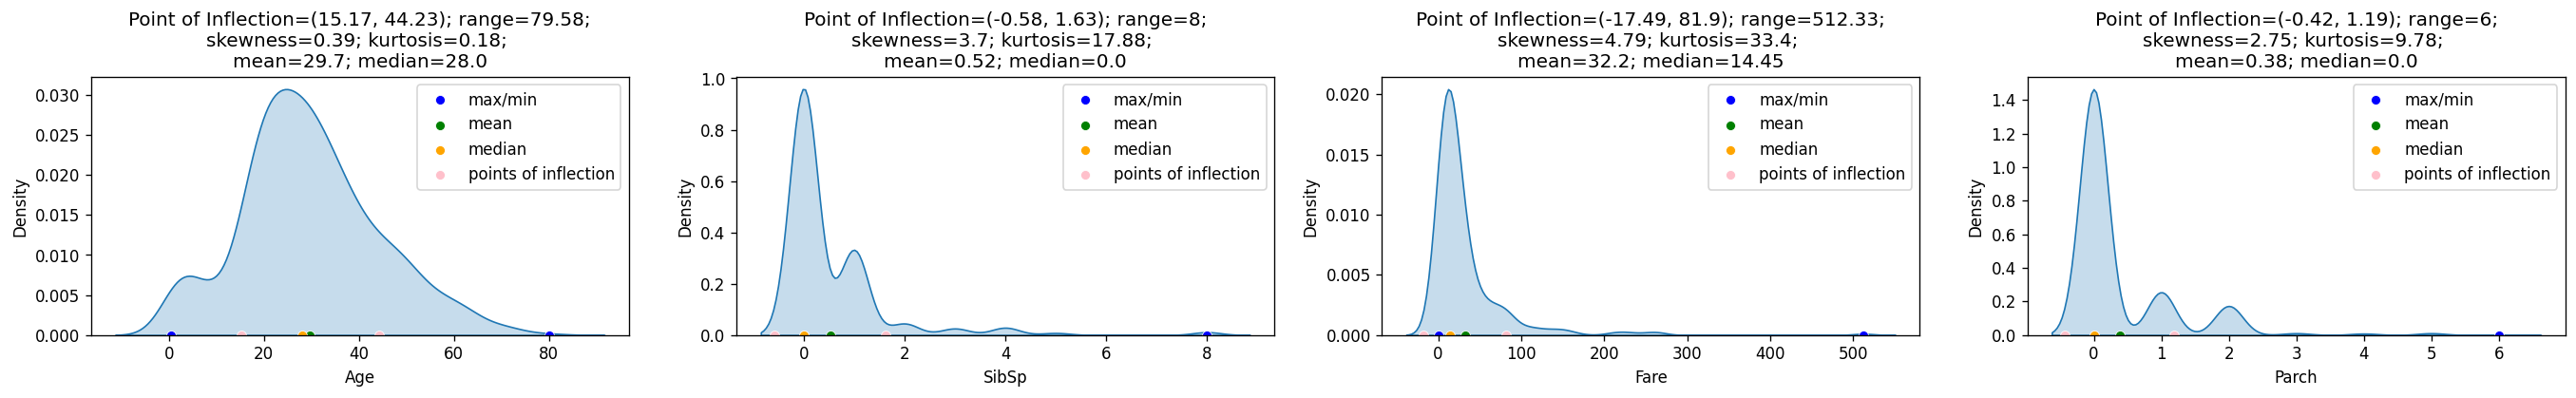

In [ ]:
UVA_numeric(train_df, numerical_features)

#### Summary from Numerica Features:

* **age**: The positive value of skewness and kurtosis(excess kurtosis) indicates that the observations of ages of the passangers' were slightly biased to the lower values as well as a high number of old and very young passangers were also boarded on that ship. In an overview, most of the passangers' ages were lied in between 29 years to 45 years.

* **sibsp**: Most of passanger were expected to have less than 2 siblings and spouses, though high values like 8 were being observed. 

* **parch**: Most of the passengers were recorded to have no parents or child travelling with them. Excluding this type of people, few passengers have 1 or 2 copassengers who is/are the subject's parent/s or child/children. Though in some cases high values like 6 parents or(and) children copassenger were recorded to travel with.

* **fare**: The obsevation is found to be as same as *sibsp*, though most of the fare were observed to be less than 90. Though, we can notice the presence of outliers in this feature. 

In [ ]:
# Custom Function for easy visualization and analysis of categorical values
def UVA_category(data, var_group):
  '''
  Univariate Analysis of Categorical Columns
  Takes a list of category and a DataFrame
  Prints/plots all value_counts and barplot
  '''
  #setting figsize
  size = len(var_group)
  plt.figure(figsize=(9*size, 5), dpi=120)

  for j, i in enumerate(var_group):
    #for counting the unique values
    norm_count = data[i].value_counts(normalize=True)
    n_uni = data[i].nunique()

    #plotting the variable with ebery information 
    plt.subplot(1, size, j+1)
    sns.barplot(norm_count, norm_count.index, order=norm_count.index)
    plt.xlabel(f'Fraction/percent', fontsize=20)
    plt.ylabel(f'{i}', fontsize=10)
    plt.title(f'n_uniques={n_uni}\nValue_counts={norm_count}')

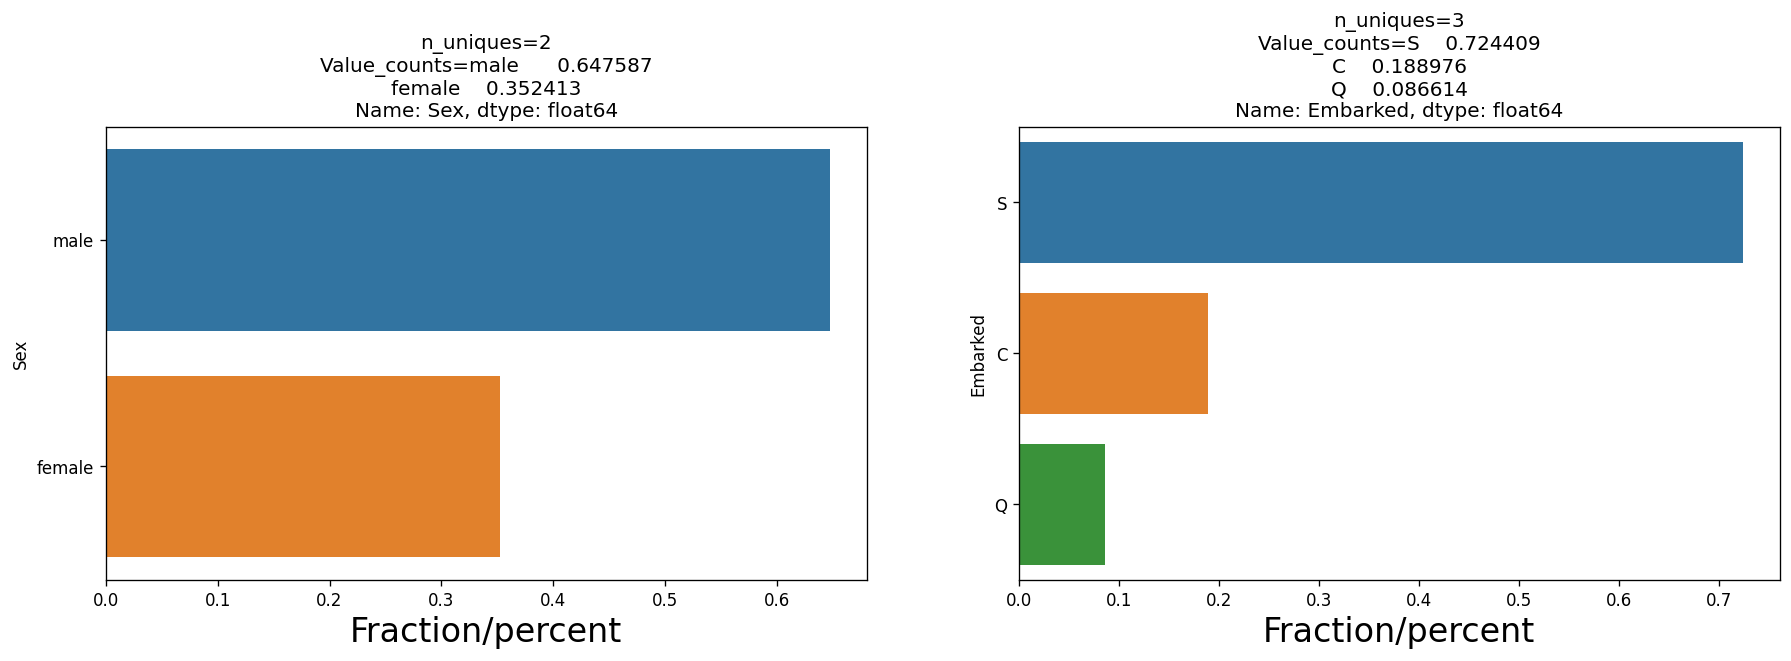

In [ ]:
UVA_category(train_df, object_features)

#### Summary of Object Features
* **sex**: Most of the passanger are *Male*.
* **embarked**: Most of the passanger boarded from Southampton.

In [ ]:
train_df['Pclass'] = train_df[categorical_int].astype('object')

In [ ]:
train_df['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

* This suggests most of the passangers had 3rd class tickets(more than 50%) in comparison with the 1st and 2nd class.

### Univariate analysis - Ouliers
It's suspected the presence of ouliers in *sibsp*, *parch*, *fare*, and *age*(in comparatively lower amount). This will be varified by the following box-whisker plots

In [ ]:
def UVA_outliers(data, var_group, include_outlier=True):

  '''
  Univariate Analysis of outliers
  Takes a group of variables (INTEGER and FLOAT) and plot/print boxplot and descriptives
  Runs a loop: calculate all the descriptives of i(th) varibales and ploot/print it
  data: DataFrame object from which to plot from
  var_group: list of subject columns
  include_outliers(bool): whether to include outliers or not, default = True 
  '''

  size = len(var_group)
  plt.figure(figsize=(7*size, 4), dpi=100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variables
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25 - (1.5*IQR)
    whis_high = quant75 + (1.5*IQR)

    #calculating descriptives of variables
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier:

      #plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i],orient="v")
      plt.ylabel(f'{i}')
      plt.title(f'With outliers\nIQR = {round(IQR,2)}; Median = {round(med,2)}; \n 2nd, 3rd Quartile={(round(quant25,2), round(quant75,2))},\nOutlier(low/high)={(outlier_low,outlier_high)}')

    else:

      #replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      #plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel(f'{i}')
      plt.title(f'With outliers\nIQR = {round(IQR,2)}; Median = {round(med,2)}; \n 1st, 3rd Quartile={(round(quant25,2), round(quant75,2))},\nOutlier(low/high)={(outlier_low,outlier_high)}')

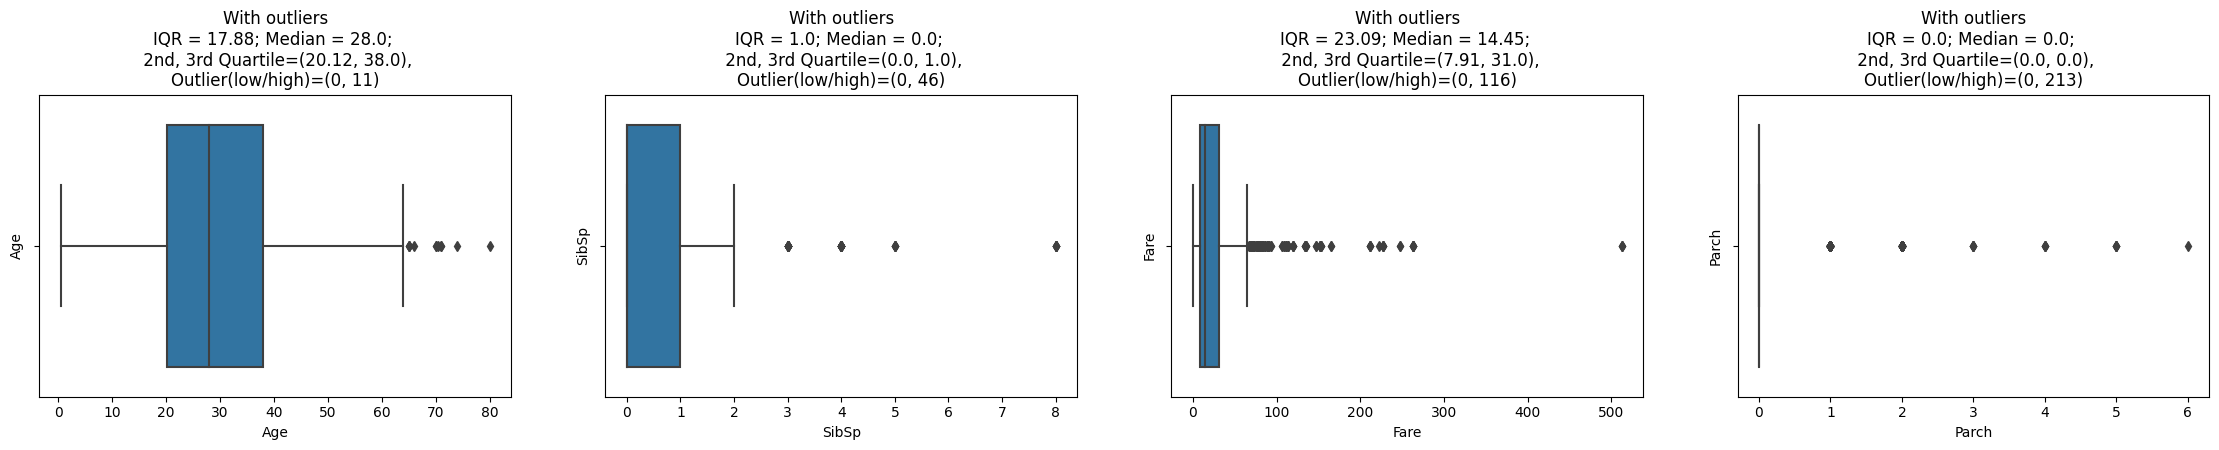

In [ ]:
UVA_outliers(train_df, numerical_features)

#### Summary from outlier analysis:
* As expected; *sibsp*, *fare*, *parch* and *age*(13) have ouliers. 

## Bivariate Analysis

In [ ]:
numerical_df = train_df[numerical_features]
numerical_df.head()

,Age,SibSp,Fare,Parch
0,22.0,1,7.2500,0
1,38.0,1,71.2833,0
2,26.0,0,7.9250,0
3,35.0,1,53.1000,0
4,35.0,0,8.0500,0


### Correaltion Matrix

In [ ]:
correlation = numerical_df.corr()
correlation

,Age,SibSp,Fare,Parch
Age,1.000000,-0.308247,0.096067,-0.189119
SibSp,-0.308247,1.000000,0.159651,0.414838
Fare,0.096067,0.159651,1.000000,0.216225
Parch,-0.189119,0.414838,0.216225,1.000000


#### Summary from correlation Matrix
* Features like age of the passangers, no. of siblings and spouses board, no. of parents and child board, fare have no strong linear relationship in between them(pair-wise).
* Though the feature fare seems to have weak linear relationship with other numerical features.
* age has weak negative correlation coefficient w.r.t. no of siblings and spouses board and the no. of parents and child board.

### Heatmap visualization 

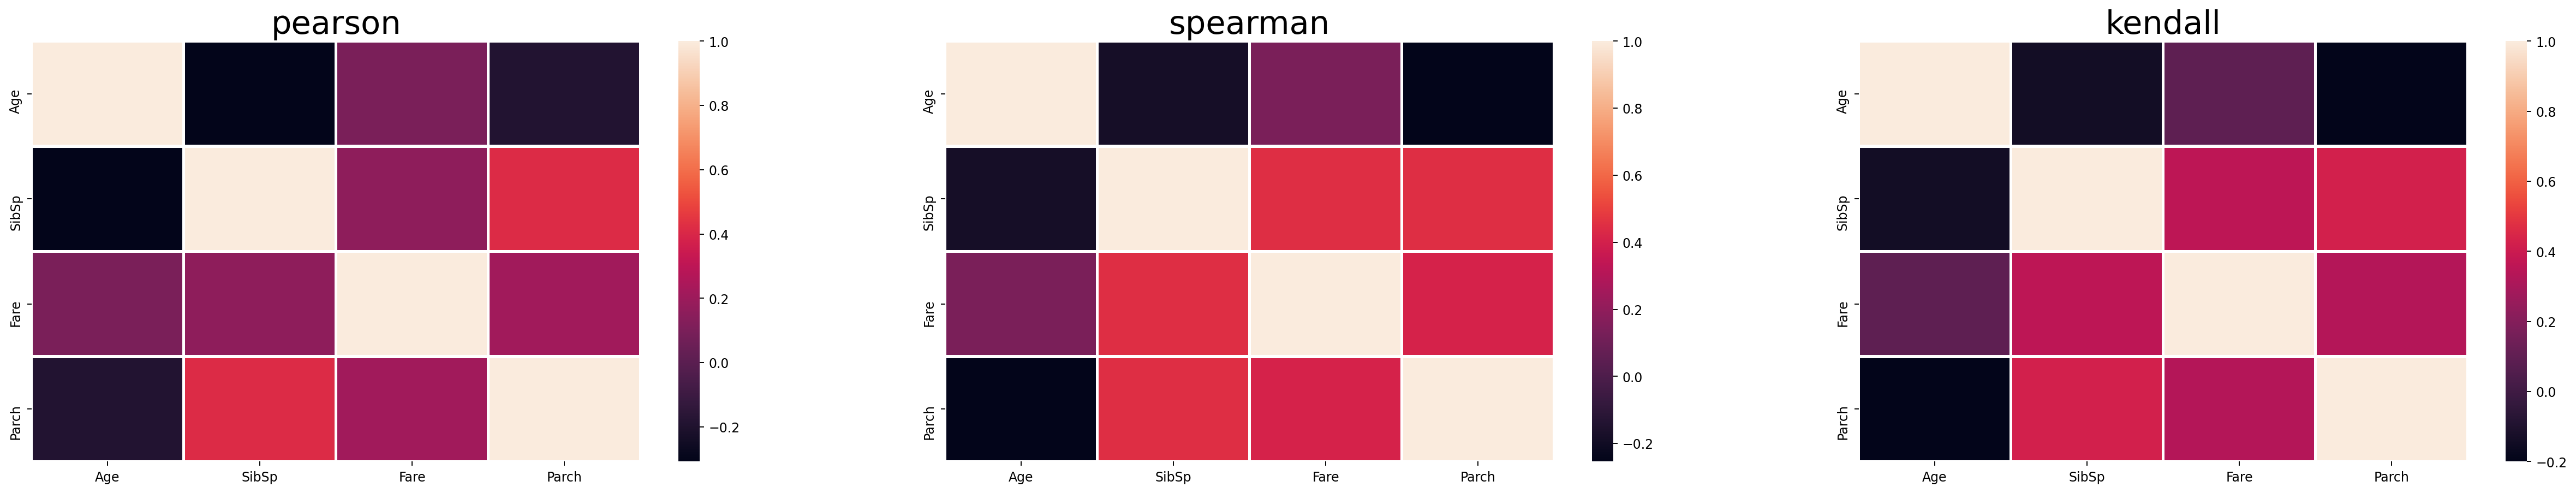

In [ ]:
plt.figure(figsize=(36,6), dpi=170)
for j, i in enumerate(['pearson', 'spearman', 'kendall']):
  plt.subplot(1, 3, j+1)
  correlation = numerical_df.corr(method=i)
  sns.heatmap(correlation, linewidths=2)
  plt.title(i, fontsize=25)

* This heatmap representation(pearson, spearman, kendall) supports the observation from the correlation matrix.

In [ ]:
def BVA_categorical(data, var_group):
  '''
  Arguments: DataFrame object, categorical feature names as a list
  plot the barplot showing the relationship between different categorical features
  and survival probability.
  '''

  size = len(var_group)
  plt.figure(figsize=(7*size, 4), dpi=100)

  for j, i in enumerate(var_group):
    plt.subplot(1, size, j+1)
    sns.barplot(x=i, y='Survived', data=train_df)
    plt.xlabel(f'{i}', fontsize=15)
    plt.ylabel(f'Survival Probability', fontsize=20)
    plt.title(f'Survival Probability by {i}', fontsize=25)
    plt.show()

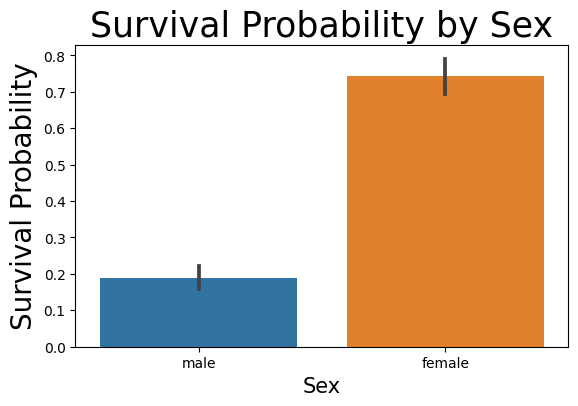

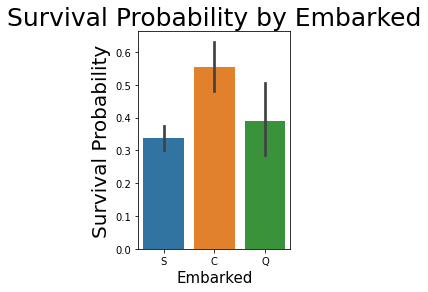

In [ ]:
BVA_categorical(train_df, object_features)

#### Summary from the above visualization:
* It's vivid from the visualization, that female passangers are more likely to be expected to survive. The main reason of this is they were help and rescued primarily in comparison with male passangers.
* An interesting fact has been noticed from the 2nd barplot which is passengers boarded from Cherbourg had high probability value to be survived. On the other hand, though most of the passangers boarded from Southampton, their probability of survival was least in comparison with others.

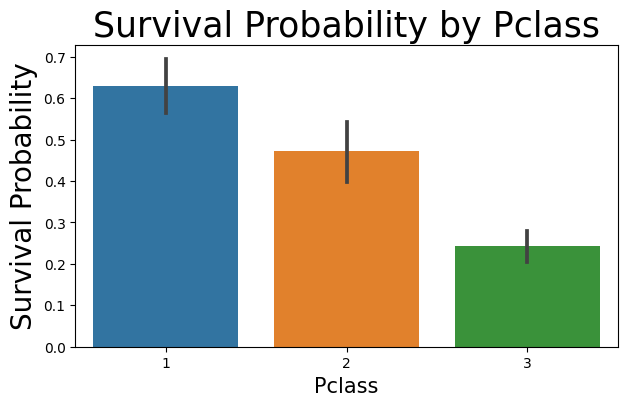

In [ ]:
BVA_categorical(train_df, ['Pclass'])

#### Summary from above visualization:
* It can be easily expected that passengers from 1st class were being helped and rescued during this trajedy. This consequenced in the high probability of their survival.
* The passengers from 3rd class had least importance, that's why a very low probability of survival(<30%) can be observed in this visualization.

### Relation between Survival Probability and Passenger with specific no. of siblings and spouses 


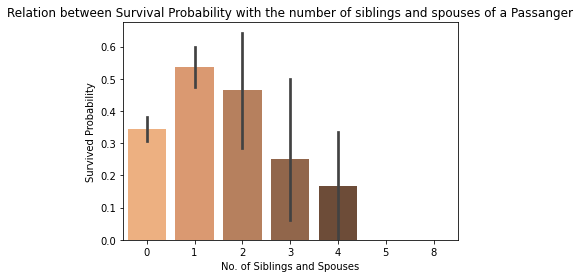

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=train_df, palette='copper_r')
plt.ylabel('Survived Probability')
plt.xlabel('No. of Siblings and Spouses')
plt.title('Relation between Survival Probability with the number of siblings and spouses of a Passanger')
plt.show()

### Relationship between Survival Probability of a passanger w.r.t. the data regarding the number of parents and child boarded with that individual

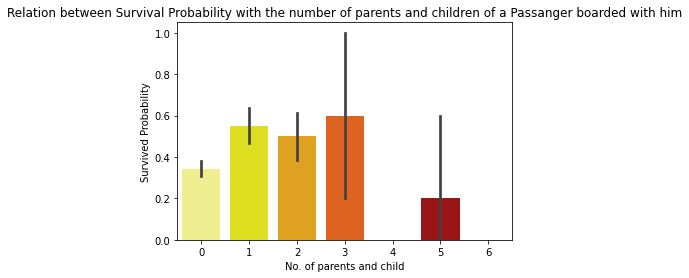

In [ ]:
sns.barplot(x='Parch', y='Survived', data=train_df, palette='hot_r')
plt.ylabel('Survived Probability')
plt.xlabel('No. of parents and child')
plt.title('Relation between Survival Probability with the number of parents and children of a Passanger boarded with him')
plt.show()

#### Summary
* Passengers who had boarded with family had high probability to be rescued. Though, we can see high decreament of survival rate when the parents and children number exceeds 3 drastically. No passengers were recorded to survive having 4 parents and children.

### Relationship between Survival Probability with age.

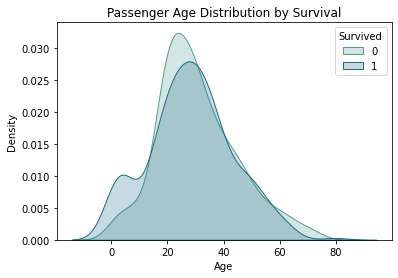

In [ ]:
sns.kdeplot(train_df['Age'][train_df["Survived"]==0], hue = train_df["Survived"], fill=True, palette='crest', linewidth=1)
sns.kdeplot(train_df['Age'][train_df["Survived"]==1], hue = train_df["Survived"], fill=True, palette='crest', linewidth=1)
plt.xlabel('Age')
plt.title("Passenger Age Distribution by Survival")
plt.show()

#### Summary
* This visualization suggests the facts discovered from univariate anlysis of the feature age and the survived feature. The same fact has been reflected in the following Kernall Density Plot.

## Multivariate Analysis

### Survival Probability w.r.t. 'Sex' and 'Pclass'(Passenger Class)

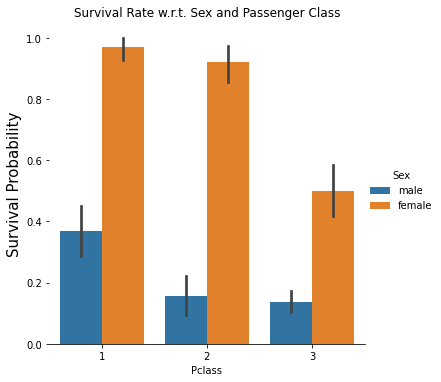

In [ ]:
plot = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=train_df, kind='bar')
plot.despine(left = True)
plt.ylabel('Survival Probability', fontsize=15)
plt.title('Survival Rate w.r.t. Sex and Passenger Class')
plt.show()

#### Summary from the above data-visulaization:
* Obviously, this visualization supports the facts obtained from the bivariate analysis of Survival Probability w.r.t. Sex and Passenger Class.
* A 1st class female passanger were the most probable to be survived from this trajedy, on the other hand, a 3rd class male passanger had least probability to survive.

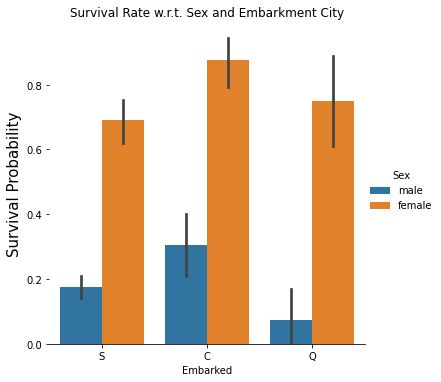

In [ ]:
plot = sns.factorplot(x='Embarked', y='Survived', hue='Sex', data=train_df, kind='bar')
plot.despine(left = True)
plt.ylabel('Survival Probability', fontsize=15)
plt.title('Survival Rate w.r.t. Sex and Embarkment City')
plt.show()

### Survival Probability w.r.t. pclass and embarked

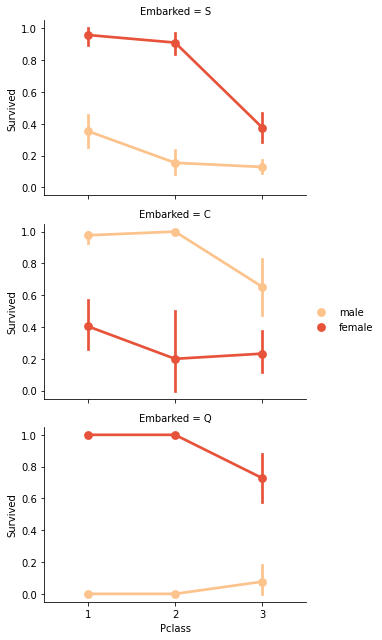

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', size=3, aspect=1.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='OrRd')
grid.add_legend()
plt.show()

#### Summary:
* The above plot suggests the same facts what we've discovered earlier. As example, female passangers were more likely to be rescued from the point of view of sex, on the other hand, 1st class passengers were more likely to be rescued in this trajedy.
* Some interesting facts have been observed from the above parplot such as Male Passengers have higher probability of survival than female passengers. This might happen due to the high quantity of male passengers boarded from Queenstown.


## Feature Generation

### No of Relatives Boarded of a specific passenger.

In [ ]:
train_df['Relatives'] = train_df['Parch'] + train_df['SibSp']
test_df['Relatives'] = test_df['Parch'] + test_df['SibSp']

### Finding the effect of the no. of relatives boarded with the subject passenger with the probability of survival.

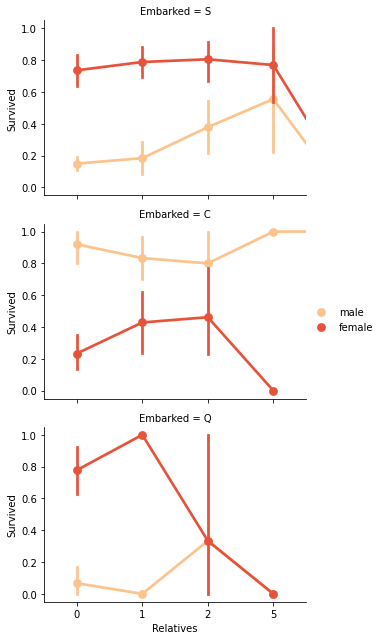

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', size=3, aspect=1.5)
grid.map(sns.pointplot, 'Relatives', 'Survived', 'Sex', palette='OrRd')
grid.add_legend()
plt.show()

#### Summary from the above plot
* This plot supports the facts discovered from univariate univariate analysis of the features *embarked*, *sex*, *pclass* and *sibsp*.
* One interesting fact that can be observed that female passengers boarded from Cherbourg are with any no of relatives are highly probable to be rescued and survived!

### Travelled Alone or not?

In [ ]:
data = [train_df, test_df]

for datalet in data:
  datalet.loc[datalet['Relatives']==0, 'Travelled_alone'] = '1'
  datalet.loc[datalet['Relatives']>0, 'Travelled_alone'] = '0'

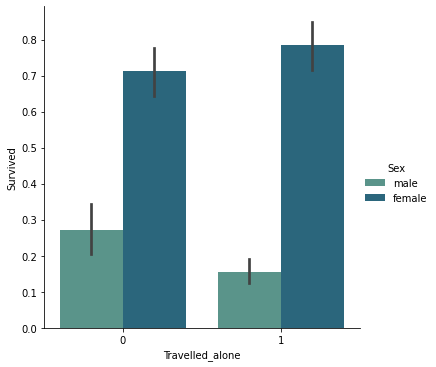

In [ ]:
sns.factorplot(x='Travelled_alone', y='Survived', hue='Sex', data=train_df, kind='bar', palette='crest')

# 3D Representation of Survival of Male and Female passenger w.r.t. Age.

In [ ]:
fig = px.scatter_3d(train_df, x='Pclass', y='Sex', z='Age', color='Survived', title='Effect of Age, Sex and Passenger Class on Survival Probability')
fig.show()

In [ ]:
fig = px.scatter_3d(train_df, x='Pclass', y='Sex', z='Embarked', color='Survived', title='Effect of Embarkment City, Sex and Passenger Class on Survival Probability')
fig.show()

#### Summary from the above 3D plot:
This plot vividly clarfies all the facts obtained from most of the visualizations done before. These are as follows:
* Female passengers had a very high probability in comparison with the male passengers especially, females from 1st and 2nd class had high probability than any other specific class. 
* Most of the male passengers from 3rd class were not able to survive this trajedy, but male passengers aged less than 15 years from 1st and 2nd class had comparatively high probability of survival.
* The probability of survival is directly proportional to the density of the yellow points in the visualization. 

#### Summary
* The above visualization supports the facts obtained from the univariate and bivariate analysis of survival rate w.r.t. gender of the passenger and the no. of parents, children, siblings and spouses had been boarded.
* The survival probability of a female passenger doesn't depend if she has travelled alone or not, but in case of a male passenger, the survival probability is noticed to be higher when the no. of relatives boarded with that subject male passenger is 0.
* This may refers to the fact that a male passenger was likely ensure the safety of his other family member primarily, on the other an alone male traveller was prone to take his own safety in first hand.

## Overall Summary:
* Most of the passengers' ages were in between 29 years to 45 years but the presence of existence of very old passenger(as an example age: 80) and infants was recorded. 
* Most of the passengers were recorded to travel with family(general family strength:2 to 3). Male passengers, recorded to travel with the family, suffered from low probability of survival, on the other hand female passengers had significant no special effect of this point on their survival rate. 
* As usual, very few passengers belonged to the 1st class. Most of the recorded passengers were recorded to travel using 3rd class ticket and this fact reflects on the fare of the ticket. Unfortunately,passengers from third class were less probable to survive, on the other hand the passengers from 1st had high probability to survive.
* Most of the passengers were male, but unfortuantely male passengers had comparatively very low probability to survive.
* Most of the passengers were from Sounthampton, but unfortunately the passengers embarked from Southampton were less probable to survive. This may happen due to a high quantity of passengers from Southampton had 3rd class tickets. Passengers, embarked from Queensbarg, had high probability of survival. Though the quantity of female passengers recoreded in Cherbourge was maximum but this fact didn't affect the survival rate. Males from Cherbourge had highest probability to survive, unfortunately it's less than 50%.
* Males from Queensberg had high probability to survive.
* Passengers aged, less than 15 years, had higher probability of survival irrespective of gender, though being from 3rd class affects the survival probability(especially for male passengers).

# Final overview on Survival Possibility:
* Female passengers and child-passengers(age<15) were primarily rescued during this trajedy which results in their survival rate.
* Passenger Class was one of the most important factor for survival. Higher the class, higher the possibility of survival!
* Many passengers from Queensberg and Cherbourge were from 1st and 2nd class, that's why the survival rate of the passengers from these two cities was higher than that of Southampton.

# Data Preprocessing

## Missing Values Removal
As, this project will be limited to only the tree-based models, the outliers won't be treated here!

### Custom Function to remove the 'NaN' values from the dataframe

In [ ]:
def missing_value_remover(data, miss_col):
  for i in miss_col:
    ver_col = train_df[i].values.reshape(-1,1)

    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    train_df[i] = imputer.fit_transform(train_df[i].values.reshape(-1,1))
    test_df[i] = imputer.fit_transform(test_df[i].values.reshape(-1,1))


In [ ]:
miss_col = ['Age', 'Fare', 'Embarked']
for data in [train_df, test_df]:
  missing_value_remover(data, miss_col)

### Removing unnecessary columns

In [ ]:
data = [train_df, test_df]

In [ ]:
for datalet in data:
  datalet['Has_cabin'] = datalet['Cabin'].apply(lambda x: 0 if type(x)==float else 1)

In [ ]:
for dataset in data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

In [ ]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [ ]:
for dataset in data:
    dataset['Title'] = dataset['Name'].apply(get_title)
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


In [ ]:
for dataset in data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'Age'] = 3
    dataset.loc[(dataset['Age']>64), 'Age'] = 4

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Travelled_alone,Has_cabin,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,1,0,0,"(16.0, 32.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,1,0,1,"(32.0, 48.0]",3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,0,1,0,"(16.0, 32.0]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,1,0,1,"(32.0, 48.0]",3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,0,1,0,"(32.0, 48.0]",1


In [ ]:
for dataset in data:
  dataset['Ticket_type'] = dataset['Ticket'].apply(lambda x: x[0:3])
  dataset['Ticket_type'] = dataset['Ticket'].astype('category')
  dataset['Ticket_type'] = dataset['Ticket_type'].cat.codes

## Feature Selection

In [ ]:
drop_cols = ['Name', 'Ticket', 'Cabin']
for dataset in data:
  dataset.drop(columns=drop_cols, inplace=True, axis=1)

In [ ]:
train_df = train_df.drop(['CategoricalAge'], axis = 1)
train_df.drop(columns=['PassengerId'], inplace=True)

# Building and implementing the Ranmdom Forest Classifier model

### Splitting the dataset

In [ ]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Deciding a range in which the hyperparameter will be decided

In [ ]:
rfc = RandomForestClassifier(random_state = 42)

In [ ]:
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_features': ['auto', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

In [ ]:
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
cv_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
best_forest = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, max_features='auto', random_state=42)

In [ ]:
best_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_test_pred = best_forest.predict(X_test)

In [ ]:
print(f'The accuracy score on test set formed from Primary Training Dataset is {accuracy_score(y_test, y_test_pred)} ')

The accuracy score on test set formed from Primary Training Dataset is 0.8208955223880597 


In [ ]:
answer_pred = best_forest.predict(test_df.iloc[:,1:])
answer_df = pd.DataFrame()
answer_df['PassengerId'] = test_df['PassengerId']
answer_df['Survived'] = answer_pred

In [ ]:
answer_df.to_csv('Titanic_test_set_answer_prediction.csv')

In [ ]:
answer = pd.read_csv('/content/Titanic_test_set_answer_prediction.csv')
answer.head()

,Unnamed: 0,PassengerId,Survived
0,0,892,0
1,1,893,1
2,2,894,0
3,3,895,0
4,4,896,1
